## Exercise 5

In [31]:
import numpy as np
import scipy.optimize as opt

In [32]:
# Parameters
gamma = 2.5
beta = 0.98
alpha = 0.40
delta = 0.10
zbar = 0
tao = 0.05
Lbar = 1

In [63]:
# Numerical Solutions
def Error_Euler(steadystate, *arguments):
    gamma, beta, alpha, delta, zbar, tao, Lbar = arguments
    cbar = steadystate[0]
    kbar = steadystate[1]
    
    rbar = alpha * ((Lbar * np.e ** zbar) / kbar) ** (1 - alpha)

    error_1 = 1/(cbar ** gamma) - beta* ((rbar - delta)*(1 - tao) + 1) / ((cbar)**gamma)
    
    error_2 = -cbar + ((1-alpha)*(kbar/(np.e **zbar))**alpha + (alpha*(np.e ** zbar / kbar) ** (1 - alpha) - delta)* kbar)
    
    return np.array([error_1, error_2])


In [64]:
# Solve for steady state consumption and kapital
arguments = gamma, beta, alpha, delta, zbar, tao, Lbar
kbarguess = .5
cbarguess = .5
solution = opt.root(Error_Euler, [cbarguess, kbarguess], args=arguments, tol=1e-8)
cbar, kbar = solution.x
cbar, kbar

(1.4845048188586933, 7.287497951065252)

In [ ]:
# algebraic solutions

In [11]:
# steady state captial
kbar = ((1 - tao)*beta*alpha)**(1/(1 - alpha))*(np.e**zbar) * Lbar / ((1 - beta + delta*(1 - tao)*beta)**(1/(1 - alpha)))
kbar

7.2874979506929884

In [12]:
#Solve for return on captial
rbar = (1 -beta) / (beta * (1 - tao)) + delta
rbar

0.1214822771213749

In [13]:
# Solve for wages
wbar = (1 - alpha)*(kbar / (Lbar*np.e ** zbar))**alpha
wbar

1.3279527683513057

In [54]:
# Solve for consumption and taxation
cbar = (wbar + (rbar - delta)*kbar)
Tbar = tao*(wbar + (rbar - delta)*kbar)
cbar, Tbar

1.4845048188497072

In [17]:
# Solve for investment
ibar = kbar - (1 - delta)*kbar
ibar

0.7287497950692989

In [19]:
# Solve for output
ybar = kbar ** alpha * (Lbar * np.e ** zbar) ** (1 - alpha)
ybar

2.213254613918843

## Exercise 6

In [79]:
gamma = 2.5
xi = 1.5
beta = .98
alpha = 0.40
a = 0.5
delta = 0.10
zbar = 0
tao = 0.05

In [115]:
# Numerical Solutions
    
def Error_Euler_2(steadystate, *arguments):
    gamma, xi, beta, alpha, a, delta, zbar, tao = arguments
    cbar = steadystate[0]
    kbar = steadystate[1]
    l_bar = steadystate[2]
    
    rbar = alpha * ((l_bar * np.e ** zbar) / kbar) ** (1 - alpha)
    wbar = (1 - alpha) * (kbar / (l_bar * np.e ** zbar)) ** alpha * (np.e **zbar)
    
    error_1 = (1/(cbar ** gamma)) - beta * (((rbar - delta)*(1 - tao) + 1) / ((cbar)**gamma))
    
    error_2 = (a) / ((1 - l_bar) ** xi) - (wbar * (1 - tao)) / (cbar ** gamma)
    
    error_3 = (cbar) - (wbar * l_bar + (rbar - delta) * kbar)
   
    return np.array([error_1, error_2, error_3])

In [117]:
# Solve for steady state consumption, capital, and labor
arguments = gamma, xi, beta, alpha, a, delta, zbar, tao
kbarguess = .5
cbarguess = .5
lbarguess = .5
solution = opt.root(Error_Euler_2, [cbarguess, kbarguess, lbarguess], args=arguments, tol=1e-8)
cbar, kbar, Lbar = solution.x
cbar, kbar, Lbar

(0.8607032061541214, 4.225229026778794, 0.5797914531669064)

In [119]:
# Solve for steady state wages and return on capital
wbar = (1 - alpha) * (kbar / (Lbar * np.e ** zbar)) ** alpha * (np.e **zbar)
rbar = alpha * ((Lbar * np.e ** zbar) / kbar) ** (1 - alpha)
wbar, rbar

(1.3279527683507593, 0.12148227712144986)

In [121]:
# Solve for taxation
Tbar = tao * cbar
Tbar

0.04303516030770607

In [122]:
# Solve for investment
ibar = kbar - (1 - delta)*kbar
ibar

0.4225229026778794

In [123]:
# Solve for Output
ybar = kbar ** alpha * (Lbar * np.e ** zbar) ** (1 - alpha)
ybar

1.2832261088318382

# Linearization Notes

## Exercise 1

The analyticall values of F, G, H, L, M, and N are already given in the notes 1.4.

In [21]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator

# Parameters
alpha =0.35
beta = 0.98
rho = 0.95
sigma = 0.02
A = beta * alpha
Kbar = A ** (1 /(1 - alpha))

F = (alpha * Kbar ** ( alpha - 1)) / (Kbar ** alpha - Kbar)
G = - (alpha * Kbar ** (alpha - 1)*(alpha + Kbar ** (alpha - 1))) / (Kbar ** alpha - Kbar)
H = (alpha ** 2 * Kbar ** (2*(alpha - 1))) / (Kbar ** alpha - Kbar)
L = - (alpha * Kbar ** (2 * alpha - 1)) / (Kbar ** alpha - Kbar)
M = (alpha ** 2 * Kbar ** (2*(alpha - 1))) / (Kbar ** alpha - Kbar)
N = rho
# Not sure why N = rho and we only use P2 and not P1 but everyone else is doing it.
P1 = (- G + np.sqrt(G*G - 4*F*H)) / (2*F)
P2 = (- G - np.sqrt(G*G - 4*F*H)) / (2*F)
Q = - (L*N + M) / (F * N + F * P2 + G)
zbar = 0
print("This is P and Q.  P: ", P2, " and Q: ", Q)

This is P and Q.  P:  0.35  and Q:  0.24750650674493596


In [62]:
def find_K_tp1(Kbar, P, Q, K, z):
    return Kbar + P*(K - Kbar) + Q*z 

def pol_fun_graph(Kbar, P, Q):
    """Plot the policy function.  Which is given in the lecture notes."""
    kspace = np.linspace(Kbar * 0.5, Kbar* 1.5, 200)
    zspace = np.linspace( -1, 1, 200)
    kt, zt = np.meshgrid(kspace, zspace)
    ktp1 = np.empty((200, 200))
    for i in range(200):
        for j in range(200):
            ktp1[i, j] = find_K_tp1(Kbar, P, Q, kspace[i], zspace[i])
    fig = plt.figure(figsize=(10, 8))
    ax = fig.gca(projection='3d')
    #ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(kt, zt, ktp1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.xlabel('K_t')
    plt.ylabel('Z_t')
    plt.title("Policy Function")
    plt.show()

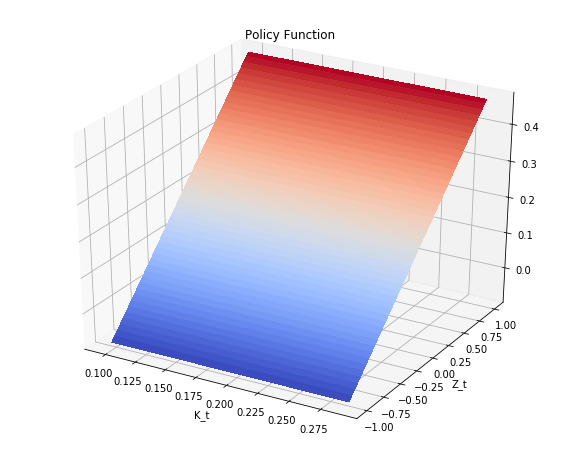

In [63]:
pol_fun_graph(Kbar, P2, Q)

### Exercise 2:


I'm confused on what we are supposed to do.

### Exercise 3:

I did this by hand. But after writing the first line in code, I realized it wasn't worth my Saturday night and so I copied the Proof from Tim. 

$ 0 = E_t \Big\{ F \tilde{X}_{t+1} + G  \tilde{X}_{t} + H \tilde{X}_{t-1} + L \tilde{Z}_{t+1} + M \tilde{Z}_{t} \Big\}$

$ 0 = E_t \Big\{ F P \tilde{X}_t + F Q \tilde{Z}_{t+1} + G P \tilde{X}_{t-1} + G Q \tilde{Z}_t + H \tilde{X}_{t-1} + L N \tilde{Z}_t + L \varepsilon_{t+1} + M \tilde{Z}_t \Big\}$

$= E_t \Big\{ F P^2 \tilde{X}_{t-1} + F P Q \tilde{Z}_t + F Q N \tilde{Z}_t + F Q \varepsilon_{t+1}G P \tilde{X}_{t-1} + G Q \tilde{Z}_t + H \tilde{X}_{t-1} + LN \tilde{Z}_t + L\varepsilon_{t+1} + M \tilde{Z}_t \Big\} $

$= E_t \Big\{ F P^2 \tilde{X}_{t-1} + F P Q \tilde{Z}_t + F Q N \tilde{Z}_t + F Q \varepsilon_{t+1}+ 
    G P \tilde{X}_{t-1} + G Q \tilde{Z}_t + H \tilde{X}_{t-1} + LN \tilde{Z}_t + L\varepsilon_{t+1} + M\tilde{Z}_t \Big\}$
    
$= F P^2 \tilde{X}_{t-1} + F P Q \tilde{Z}_t + F Q N \tilde{Z}_t +
    G P \tilde{X}_{t-1} + G Q \tilde{Z}_t + H \tilde{X}_{t-1} + LN \tilde{Z}_t + M\tilde{Z}_t $
    
$= (F P^2 + GP + H) \tilde{X}_{t-1} + (F P Q + F Q N + G Q + LN + M) \tilde{Z}_t $

$= ((F P + G)P + H) \tilde{X}_{t-1} + ((FQ + L)N + (FP + G)Q + M) \tilde{Z}_t $

### Exercise 4:

In [ ]:
# Parameters
gamma = 2.5
xi = 1.5
beta = 0.98
alpha = 0.40
a = 0.5
delta = 0.1
zbar = 0
p_z = 0.9
tau = 0.05

In [ ]:
#Solve for k, c, r, w, l, T, y, i
u = (c ** (1 - gamma) - 1) / ( 1 - gamma) + a * ((1 - l) ** (1 - xi) - 1) / (1 - xi)
F = K ** alpha * (L * np.e ** z) ** (1 - alpha)